In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [210]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import iqr


import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline
sns.set_style('whitegrid')

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import validation_curve
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, Normalizer
from sklearn.metrics import roc_auc_score, precision_score, recall_score, accuracy_score, fbeta_score, classification_report
from sklearn.linear_model import LogisticRegression

### Область работы 2 (поиск  модели .... )

In [212]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = 'train.csv' # содержит только имя файла, без имен папок !!!
df = pd.read_csv(path_train)

# EDA

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1725 entries, 0 to 1724
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1725 non-null   float64
 1   volatile acidity      1725 non-null   float64
 2   citric acid           1725 non-null   float64
 3   residual sugar        1725 non-null   float64
 4   chlorides             1725 non-null   float64
 5   free sulfur dioxide   1725 non-null   float64
 6   total sulfur dioxide  1725 non-null   float64
 7   density               1725 non-null   float64
 8   pH                    1725 non-null   float64
 9   sulphates             1725 non-null   float64
 10  alcohol               1725 non-null   float64
 11  quality               1725 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.8 KB


In [214]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [215]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,6.821797,0.283849,0.332545,5.725652,0.044460,34.615072,135.248116,0.993532,3.201449,0.492394,10.734348,6.004638
std,0.853886,0.106090,0.122279,4.570812,0.021236,16.751535,42.848854,0.002830,0.151395,0.121452,1.272796,1.071667
min,3.900000,0.085000,0.000000,0.600000,0.012000,3.000000,10.000000,0.987110,2.830000,0.220000,8.400000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.034000,23.000000,105.000000,0.991320,3.100000,0.400000,9.600000,5.000000
50%,6.800000,0.270000,0.320000,4.600000,0.041000,33.000000,130.000000,0.993200,3.190000,0.480000,10.600000,6.000000
75%,7.300000,0.330000,0.380000,8.700000,0.049000,45.000000,164.000000,0.995500,3.300000,0.560000,11.700000,7.000000
max,11.800000,1.100000,1.660000,20.700000,0.290000,124.000000,366.500000,1.001820,3.820000,1.080000,14.200000,9.000000


In [216]:
print('Пусто по дупликатам')
df[df.duplicated()]

Пусто по дупликатам


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


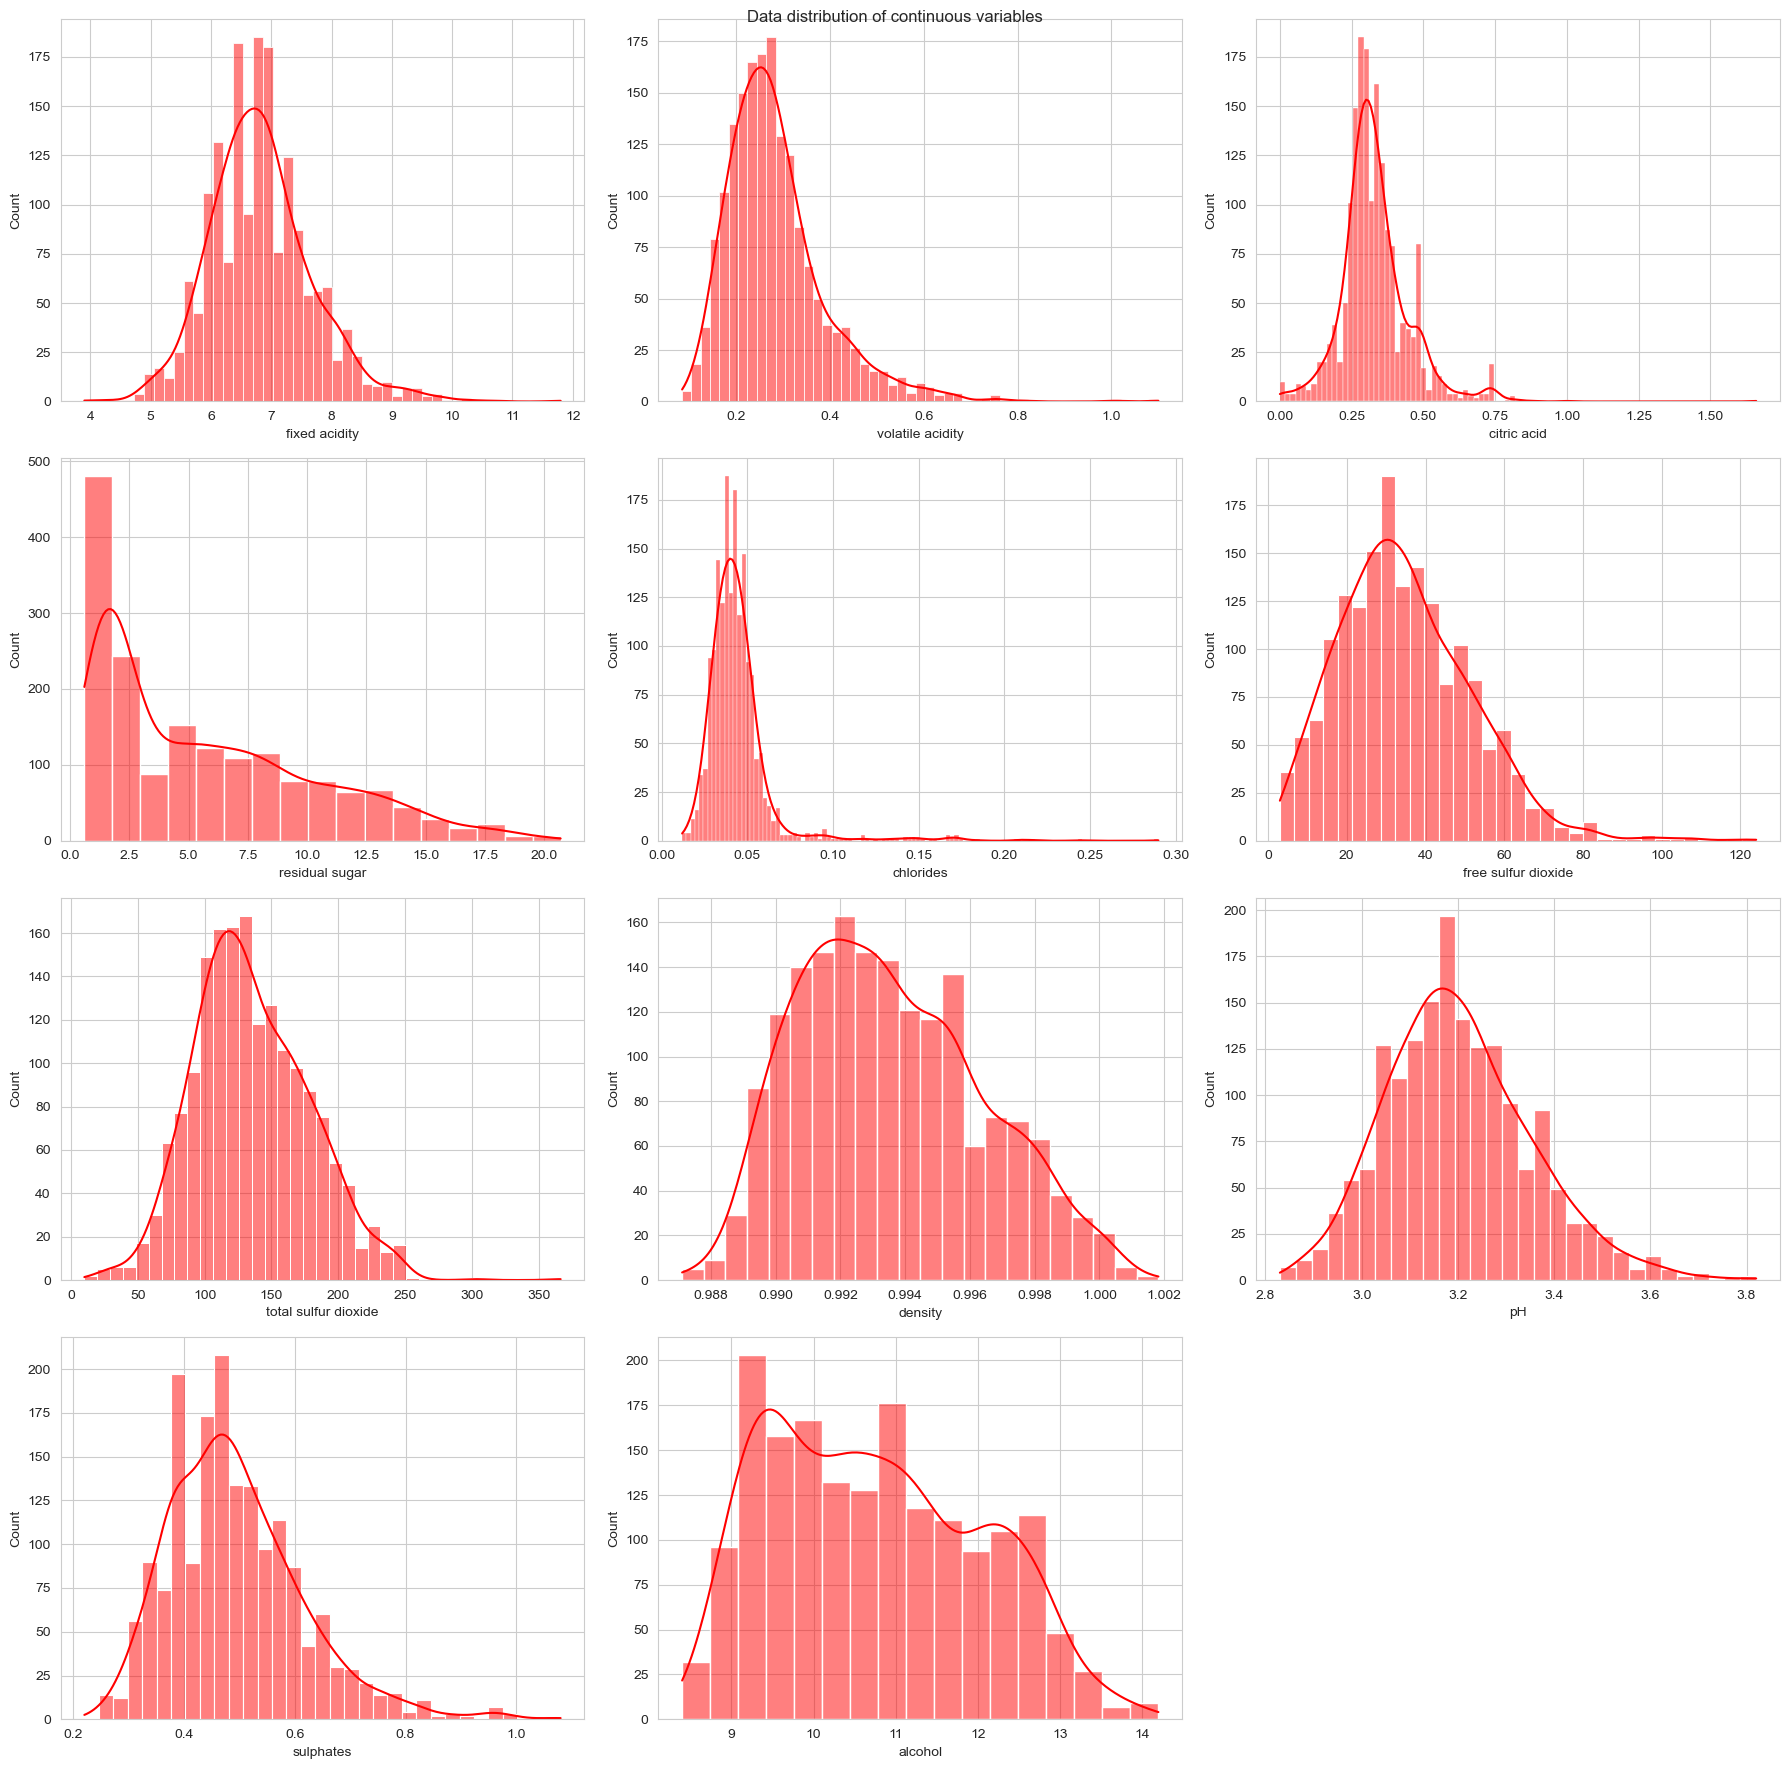

In [217]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64']).columns):
    plt.rcParams['axes.facecolor'] = 'white'
    ax = plt.subplot(4,3, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='red',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

In [218]:
df.corr().style.background_gradient(cmap = 'Greys')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.019249,0.308119,0.110090,0.046589,-0.071502,0.090890,0.298510,-0.428505,-0.027443,-0.136929,-0.164886
volatile acidity,-0.019249,1.000000,-0.193696,0.097584,0.098649,-0.117890,0.100351,0.044907,-0.054374,-0.070820,0.036713,-0.224332
citric acid,0.308119,-0.193696,1.000000,0.088621,0.118834,0.110299,0.123885,0.139801,-0.151155,0.045080,-0.050179,0.022927
residual sugar,0.110090,0.097584,0.088621,1.000000,0.096714,0.321649,0.438185,0.798569,-0.166196,-0.030785,-0.404295,-0.140981
chlorides,0.046589,0.098649,0.118834,0.096714,1.000000,0.101924,0.222393,0.306691,-0.090465,0.042989,-0.404737,-0.275969
free sulfur dioxide,-0.071502,-0.117890,0.110299,0.321649,0.101924,1.000000,0.605713,0.304056,0.012516,0.084226,-0.237443,0.057952
total sulfur dioxide,0.090890,0.100351,0.123885,0.438185,0.222393,0.605713,1.000000,0.562273,0.014276,0.152732,-0.439156,-0.187903
density,0.298510,0.044907,0.139801,0.798569,0.306691,0.304056,0.562273,1.000000,-0.056469,0.080527,-0.802832,-0.392913
pH,-0.428505,-0.054374,-0.151155,-0.166196,-0.090465,0.012516,0.014276,-0.056469,1.000000,0.168643,0.075596,0.171493
sulphates,-0.027443,-0.070820,0.045080,-0.030785,0.042989,0.084226,0.152732,0.080527,0.168643,1.000000,-0.026955,0.064579


С данными ок. 

Разметим классы.

In [219]:
df.quality = np.where(df.quality < 7, 0, 1)

#### Общие соображения

"Цель: научиться приобретать вино качеством от 7 и более (7, 8 и т.д.)...ведет по пути дата-сатаниста" K.Ю. Шилин
Чего мы не хотим: покупать плохое вино (баллом ниже 7, те "нули"), значит минимизоровав
$$ 
Precision = \min\nolimits_{FP}\frac{TP}{TP+FP}
$$
добьемся желаемого.

# K-neighbours classifier

 Корреляция между содержанием сахара и плотностью не удивляет. Выкинем `density`, тк она коррелирует и с другими признаками. Стоит выкидывать высоко коррелированные признаки, т.к. kNN работает на расстояних между объектами.

In [221]:
df = df.drop(columns = 'density')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol,quality
0,6.4,0.17,0.34,1.5,0.091,42.0,135.0,3.25,0.49,9.6,1
1,8.0,0.42,0.36,5.0,0.037,34.0,101.0,3.13,0.57,12.3,1
2,6.7,0.27,0.25,8.0,0.053,54.0,202.0,3.22,0.43,9.3,0
3,5.2,0.21,0.31,1.7,0.048,17.0,61.0,3.24,0.37,12.0,1
4,7.6,0.48,0.37,1.2,0.034,5.0,57.0,3.05,0.54,10.4,0


In [222]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, test_size=0.3,
                                                    stratify=df.quality)

Сделаем сначала $Grid Search$ с большим шагом по количеству соседей

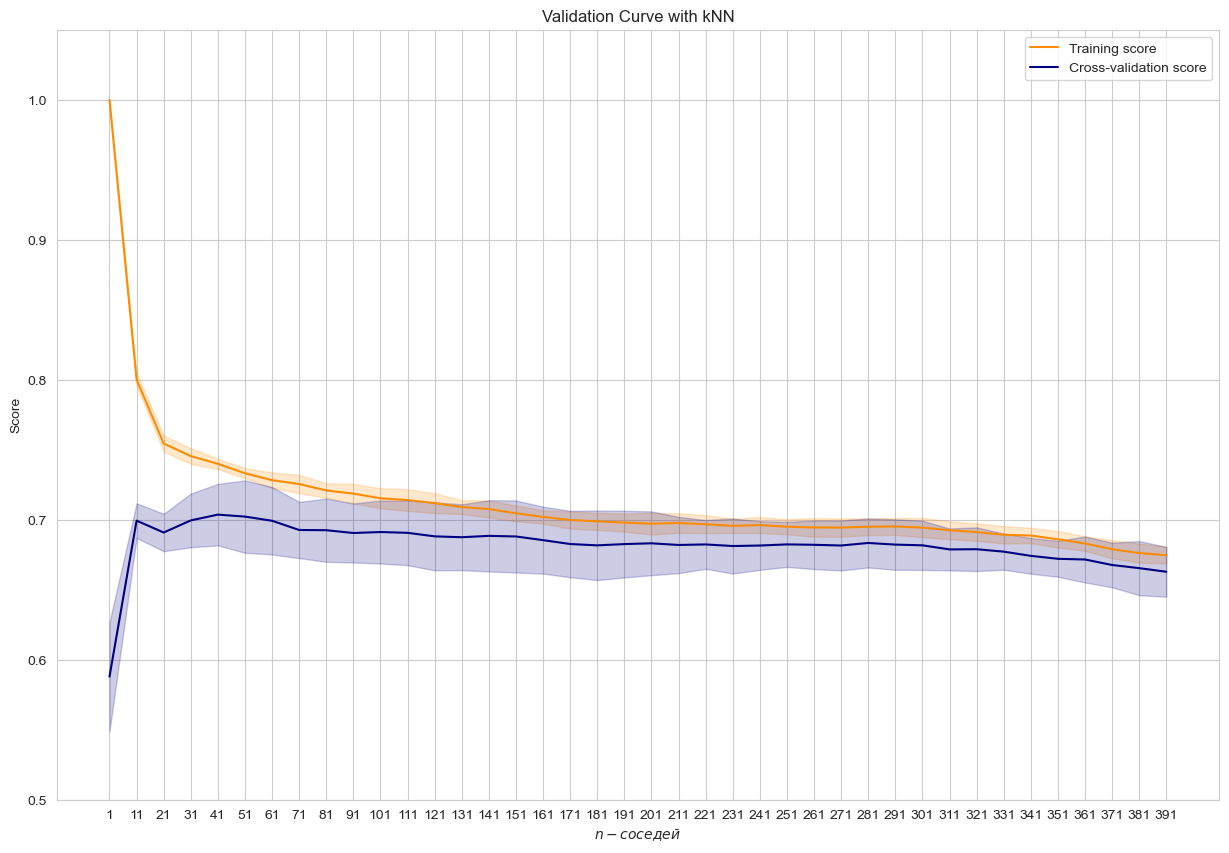

In [223]:
knk = KNeighborsClassifier()

n_range = np.arange(1, 401, 10)

train_scores, test_scores = validation_curve(
    knk, X_train, y_train,
    param_name="n_neighbors", 
    param_range=n_range,
    cv=StratifiedKFold(shuffle=True), 
    scoring="roc_auc")


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve with kNN")
plt.xlabel("$n-соседей$")
plt.ylabel("Score")
plt.ylim(0.5, 1.05)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.xticks(n_range)
plt.legend(loc="best")
plt.show()

Сделаем подробный $Grid Search$ от 80 до 140 по ROC AUC с подбором препроцессинга и др. гиперпараметров

In [224]:
pipe = Pipeline([('preprocessing', MinMaxScaler()), 
                 ('classifier',    KNeighborsClassifier())])

# определим кросс-валидацию
kfold = StratifiedKFold(n_splits=15, shuffle=True)

# Определим параметры для перебора по решетке

p = np.arange(1,5)
weights = ['uniform','distance']
n_neighbors = np.arange(80,140)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler() ]


# параметры решетки
param_grid =[
    {'preprocessing': scaling, 
     'classifier': [KNeighborsClassifier()],
         'classifier__n_neighbors': n_neighbors,
         'classifier__p': p,
         'classifier__weights': weights
     }]

grid = GridSearchCV(pipe, param_grid, cv=kfold, scoring = 'roc_auc')
grid.fit(X_train,y_train)
grid

GridSearchCV(cv=StratifiedKFold(n_splits=15, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid=[{'classifier': [KNeighborsClassifier(n_neighbors=116,
                                                              p=1,
                                                              weights='distance')],
                          'classifier__n_neighbors': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139]),
                          'classifier__p': array([1, 2, 3, 4]),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler()]}],
             scoring='roc_auc')

In [225]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,868,100,892,52,76,172,772,4,916,844,...,1196,1172,1244,1388,1220,1268,1364,1292,1340,1316
mean_fit_time,0.003556,0.0036,0.003637,0.003702,0.0036,0.003604,0.003608,0.003673,0.003667,0.0035,...,0.004975,0.00515,0.004961,0.005001,0.00506,0.005098,0.004993,0.00491,0.005134,0.005101
std_fit_time,0.000513,0.00049,0.00053,0.000439,0.000611,0.000491,0.000456,0.000432,0.000471,0.000447,...,0.000107,0.000382,0.000147,0.0,0.000257,0.000207,0.000264,0.000259,0.00034,0.000271
mean_score_time,0.004855,0.004335,0.004862,0.004069,0.004401,0.004481,0.004638,0.00404,0.004801,0.004777,...,0.019072,0.01897,0.01884,0.018738,0.018913,0.018946,0.019006,0.018863,0.018804,0.018338
std_score_time,0.000359,0.000472,0.000299,0.000298,0.00049,0.00049,0.0005,0.000282,0.0004,0.000499,...,0.000254,0.000523,0.000487,0.000442,0.000432,0.000481,0.000449,0.000424,0.000542,0.000471
param_classifier,"KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...",...,"KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei...","KNeighborsClassifier(n_neighbors=116, p=1, wei..."
param_classifier__n_neighbors,116,84,117,82,83,87,112,80,118,115,...,129,128,131,137,130,132,136,133,135,134
param_classifier__p,1,1,1,1,1,1,1,1,1,1,...,4,4,4,4,4,4,4,4,4,4
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler()
params,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...,{'classifier': KNeighborsClassifier(n_neighbor...


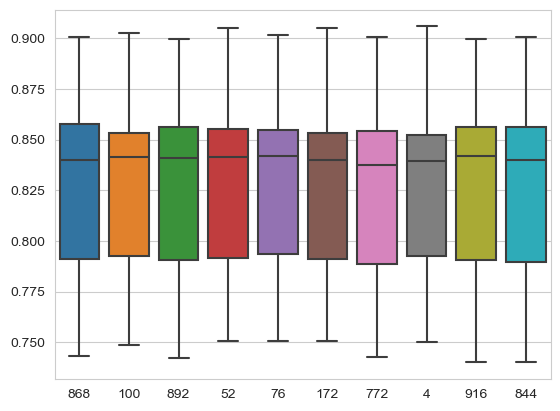

In [226]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl);

In [227]:
pipe_knn = Pipeline([('preprocessing', StandardScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=84, p = 1, weights='distance'))])
pipe_knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier',
                 KNeighborsClassifier(n_neighbors=84, p=1,
                                      weights='distance'))])

Подёргаем treshhold

In [465]:
thresholds = np.unique(pipe_knn.predict_proba(X_test)[:,1])

max_precision, max_threshold = 0, 0
y_pred_proba = pipe_knn.predict_proba(X_test)[:,1]

for threshold in thresholds:
        # Применение порога к вероятностям классов
        y_pred_raw = y_pred_proba > threshold
        # Преобразование булевых значений в целочисленные
        y_pred = y_pred_raw.astype(int)
        # Вычисление precision
        pre = fbeta_score(y_test, y_pred, beta = 0.2)
        if pre > max_precision:
            max_precision, max_threshold = pre, threshold
print(f'Treshold: {max_threshold} fbeta {max_precision}')

Treshold: 0.6865884799878101 fbeta 0.9902213072568193


In [241]:
y_pred = (pipe_knn.predict_proba(X_test)[:,1] > max_threshold).astype(int)

print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('fbeta', fbeta_score(y_test, y_pred, beta = 0.2))
print('ROC AUC', roc_auc_score(y_test, y_pred))

precision 0.8275862068965517
recall 0.3870967741935484
fbeta 0.7928843710292248
ROC AUC 0.670958025650991


In [431]:
pr, rec = [], []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, test_size=0.3,
                                                    stratify=df.quality)
    
    pipe_knn = Pipeline([('preprocessing', StandardScaler()), 
                    ('classifier',    KNeighborsClassifier(n_neighbors=80, p = 1, weights='distance'))])
    pipe_knn.fit(X_train, y_train)
    
    y_pred = (pipe_knn.predict_proba(X_test)[:,1] > max_threshold).astype(int)
    
    pr.append(precision_score(y_test, y_pred))
    rec.append(recall_score(y_test, y_pred))


In [432]:
print('mean precision', np.array(pr).mean())
print('std precision', np.array(pr).std())
print('mean recall', np.array(rec).mean())
print('std recall', np.array(fbeta).std())
#проверка на устойчивость

mean precision 0.8209796565706535
std precision 0.048326047666338655
mean recall 0.26482795698924727
std recall 0.033428327069327066


## Logistic Regression

#### Общие соображения

Понадеясь на регуляризацию, не будем выкидывать высоко коррелированные признаки или будем....

In [58]:
path_train = 'train.csv' 
df = pd.read_csv(path_train)
df.quality = np.where(df.quality < 7, 0, 1)
df = df.drop(columns = 'density') #будем всё таки

In [59]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, test_size=0.3)

In [453]:
pipe = Pipeline([('preprocessing', MinMaxScaler()),
                 ('classifier', LogisticRegression())])

kfold = StratifiedKFold(n_splits=10, shuffle=True)
scaling = [ MinMaxScaler(), StandardScaler(),RobustScaler(), Normalizer()]

param_grid =[
    {'preprocessing': scaling,'classifier__penalty': ['l2'], 
         'classifier__solver': ['newton-cg' ,'lbfgs', 'liblinear', 'sag', 'saga'],
         'classifier__tol' : [1e-1, 1e-2, 1e-3, 1e-4],
         'classifier__class_weight' : ['balanced', None]},
    {'preprocessing': scaling,'classifier__penalty': ['l1'], 
         'classifier__solver': ['liblinear', 'saga'],
         'classifier__tol' : [1e-1, 1e-2, 1e-3, 1e-4],
         'classifier__class_weight' : ['balanced', None]},
    {'preprocessing': scaling,'classifier__penalty': [None], 
         'classifier__solver': ['newton-cg' ,'lbfgs', 'newton-cholesky', 'sag', 'saga'],
         'classifier__tol' : [1e-1, 1e-2, 1e-3, 1e-4],
         'classifier__class_weight' : ['balanced', None]}
    ]

grid = GridSearchCV(pipe, param_grid, cv = kfold, scoring='roc_auc')
grid.fit(X_train, y_train)
grid   

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing', MinMaxScaler()),
                                       ('classifier', LogisticRegression())]),
             param_grid=[{'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': ['l2'],
                          'classifier__solver': ['newton-cg', 'lbfgs',
                                                 'liblinear', 'sag', 'saga'],
                          'classifier__tol': [0.1...
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]},
                         {'classifier__class_weight': ['balanced', None],
                          'classifier__penalty': [None],
                          'classifier__solver': ['newton-cg', 'lbfgs',
                                                 'newton-cholesky', 'sag',
                                                 'saga'],
                          'classifier__tol': [0.1, 0.01, 0.001, 0.0001],
                          'preprocessing': [MinMaxScaler(), StandardScaler(),
                                            RobustScaler(), Normalizer()]}],
             scoring='roc_auc')

In [454]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,145,193,209,369,161,274,126,122,118,154,...,111,143,159,155,151,123,127,131,119,115
mean_fit_time,0.003722,0.002855,0.00159,0.005097,0.002943,0.005615,0.00678,0.005355,0.004413,0.007659,...,0.005377,0.00433,0.004973,0.004256,0.003616,0.003622,0.003641,0.001814,0.001258,0.002427
std_fit_time,0.002393,0.003563,0.002369,0.004395,0.000246,0.000683,0.002887,0.000612,0.001449,0.000642,...,0.003704,0.003015,0.000468,0.000389,0.001372,0.000496,0.000779,0.001531,0.001445,0.000936
mean_score_time,0.001543,0.000952,0.003211,0.000311,0.001296,0.001867,0.002246,0.001674,0.001659,0.001402,...,0.000912,0.002473,0.001637,0.00149,0.002108,0.002006,0.001798,0.003249,0.003168,0.001728
std_score_time,0.000748,0.002375,0.002403,0.000475,0.000456,0.000332,0.000686,0.000569,0.001474,0.000488,...,0.002094,0.002654,0.000456,0.000491,0.0016,0.000261,0.000599,0.001776,0.001374,0.001118
param_classifier__class_weight,None,None,None,None,balanced,balanced,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
param_classifier__penalty,l2,l1,l1,None,l1,None,l2,l2,l2,l2,...,l2,l2,l2,l2,l2,l2,l2,l2,l2,l2
param_classifier__solver,saga,liblinear,saga,saga,liblinear,sag,liblinear,liblinear,liblinear,saga,...,lbfgs,sag,saga,saga,saga,liblinear,liblinear,sag,liblinear,liblinear
param_classifier__tol,0.1,0.1,0.1,0.1,0.1,0.1,0.0001,0.001,0.01,0.001,...,0.0001,0.0001,0.0001,0.001,0.01,0.001,0.0001,0.1,0.01,0.1
param_preprocessing,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),RobustScaler(),...,Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer(),Normalizer()
params,"{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': 'balanced', 'clas...","{'classifier__class_weight': 'balanced', 'clas...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...",...,"{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier...","{'classifier__class_weight': None, 'classifier..."


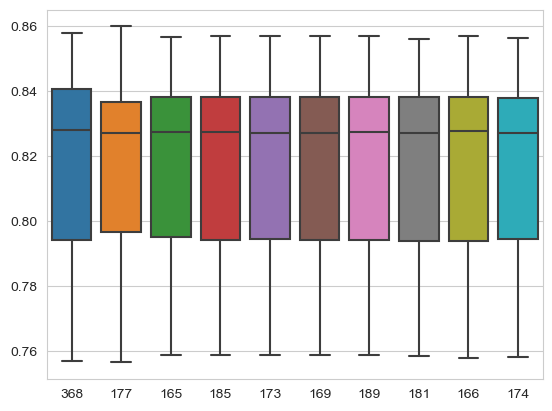

In [452]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl); #мне №10

In [455]:
pipe_log = Pipeline([('preprocessing', StandardScaler()), 
                    ('classifier',    LogisticRegression(penalty='l2', solver='sag', tol = 0.1,
                                                         class_weight=None))])
pipe_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('classifier', LogisticRegression(solver='sag', tol=0.1))])

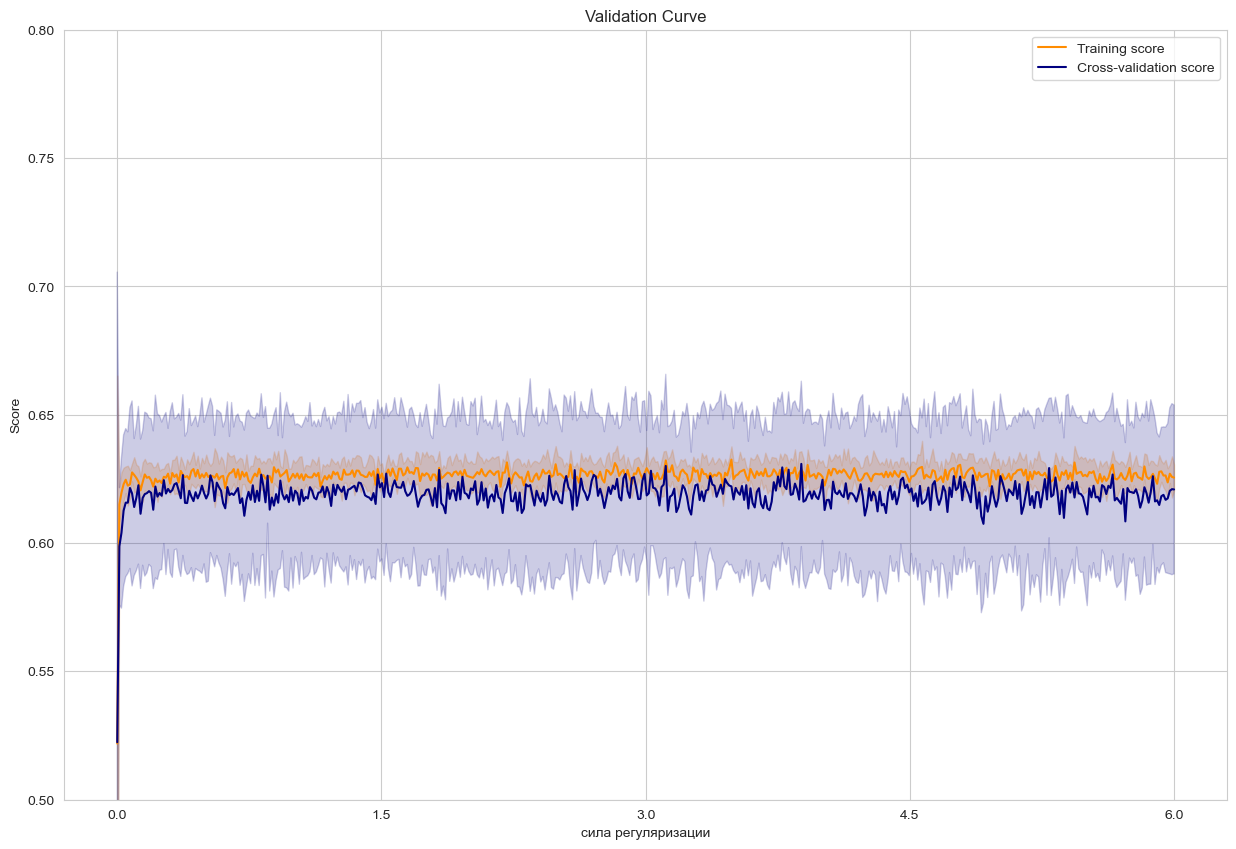

In [456]:
pipe_c = make_pipeline(StandardScaler(), LogisticRegression(penalty='l2', solver='sag', tol = 0.1,
                                                         class_weight=None))

kfold = StratifiedKFold(n_splits=10, shuffle=True)

n_range = np.linspace(0.0001, 6, 500)
train_scores, test_scores = validation_curve(
    pipe_c , X_train, y_train,
    param_name = "logisticregression__C", 
    param_range = n_range,
    cv = kfold, 
    scoring="precision", 
    n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(15,10))

plt.title("Validation Curve")
plt.xlabel("сила регуляризации")
plt.ylabel("Score")
plt.ylim(0.5, 0.8)

plt.plot(n_range, train_scores_mean, label="Training score", color="darkorange")
plt.fill_between(n_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(n_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(n_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")

plt.xticks(np.linspace(0, 6, 5))
plt.legend(loc="best")
plt.show() #этот std *cringe*

In [459]:
best_param = n_range[np.argmax(np.mean(test_scores, axis=1))]
best_param

3.883802805611223

In [460]:
pipe_log = Pipeline([('preprocessing', StandardScaler()), 
                    ('classifier',    LogisticRegression(penalty='l2', solver='sag', tol = 0.1,
                                                         class_weight=None, C = best_param))])

pipe_log.fit(X_train, y_train)

y_pred = pipe_log.predict(X_test)
print(classification_report(y_test, y_pred))
print('ROC AUC', roc_auc_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       332
           1       0.72      0.58      0.64       186

    accuracy                           0.77       518
   macro avg       0.75      0.73      0.74       518
weighted avg       0.76      0.77      0.76       518

ROC AUC 0.7270695685969685


In [461]:
thresholds = np.unique(pipe_log.predict_proba(X_test)[:,1])

max_precision, max_threshold = 0, 0
y_pred_proba = pipe_knn.predict_proba(X_test)[:,1]

for threshold in thresholds:
        # Применение порога к вероятностям классов
        y_pred_raw = y_pred_proba > threshold
        # Преобразование булевых значений в целочисленные
        y_pred = y_pred_raw.astype(int)
        # Вычисление precision
        pre = fbeta_score(y_test, y_pred, beta = 0.5)
        if pre > max_precision:
            max_precision, max_threshold = pre, threshold
print(f'Treshold: {max_threshold}: fbeta {max_precision}')

Treshold: 0.722118321800509: fbeta 0.9366576819407008


In [462]:
y_pred = (pipe_log.predict_proba(X_test)[:,1] > max_threshold).astype(int)

print('precision', precision_score(y_test, y_pred))
print('recall', recall_score(y_test, y_pred))
print('fbeta', fbeta_score(y_test, y_pred, beta = 0.5))
print('ROC AUC', roc_auc_score(y_test, y_pred))

precision 0.7301587301587301
recall 0.24731182795698925
fbeta 0.5251141552511416
ROC AUC 0.5980535043399404


In [463]:
pr, rec = [], []

for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['quality']), df.quality, test_size=0.3,
                                                    stratify=df.quality)
    
    pipe_log.fit(X_train, y_train)
    
    y_pred = (pipe_log.predict_proba(X_test)[:,1] > max_threshold).astype(int)
    
    pr.append(precision_score(y_test, y_pred))
    rec.append(recall_score(y_test, y_pred))

In [464]:
print('mean precision', np.array(pr).mean())
print('std precision', np.array(pr).std())
print('mean recall', np.array(rec).mean())
print('std recall', np.array(fbeta).std())
#проверка на устойчивость

mean precision 0.7418676047755511
std precision 0.045707756822721615
mean recall 0.26632258064516134
std recall 0.03260804683690616
